## Homework

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

## Dataset

In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

### Import Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

### Load Data

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Look at the median_house_value variable. Does it have a long tail?

#### Distribution of price

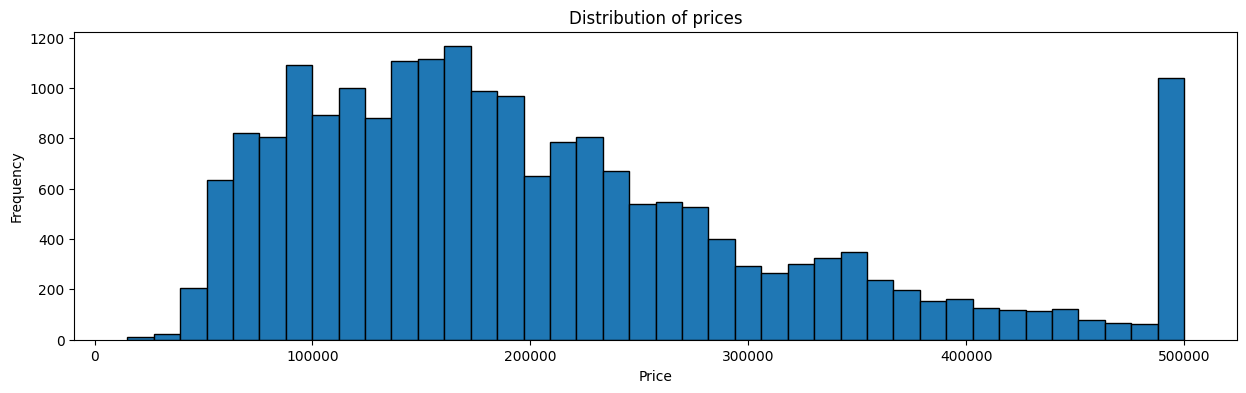

In [8]:
plt.figure(figsize=(15, 4))

sns.histplot(df.median_house_value, bins=40,alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

**Answer**:Looking at the distrubution of price in the median_house_value we cah observe that indeed it has a long tail

Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

In [9]:
df[(df.ocean_proximity=='<1H OCEAN') | (df.ocean_proximity=='INLAND')]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Next, use only the following columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'

In [10]:
df=df[[
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]]

In [11]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Question 1**

There's one feature with missing values. What is it?

- total_rooms
- total_bedrooms
- population
- households

In [12]:
df.isnull().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [13]:
# option 2
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [14]:
# option 3
df.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [15]:
# option 4
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Answer**: The feature with missing values is **total_bedrooms**

**Question 2**

What's the median (50% percentile) for variable 'population'?

- 995
- 1095
- 1195
- 1295

In [16]:
median=df.population.median()

In [17]:
median=df.population.quantile()

In [18]:
median

1166.0

In [19]:
abs(median-1095)

71.0

In [20]:
abs(median-1195)

29.0

**Answer**: The median for variable 'population' is the option closer to the median value which is **1195**

## Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [21]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# set target value for training, validation and test sets
y_train_orig = df_train['median_house_value']
y_val_orig = df_train['median_house_value']
y_test_orig = df_train['median_house_value']

# apply log transformation
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

# delete targets values from train, test and validation sets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

**Question 3**

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

**Options:**

- With 0
- With mean
- Both are equally good

## Option 1: Fill with 0

In [22]:
# function to fill na values given df
def prepare_X(df,fill_na_value):
    return df.fillna(fill_na_value)

In [23]:
# linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [24]:
# rmse
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
df_train.total_bedrooms=prepare_X(df_train.total_bedrooms,0)

In [26]:
df_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [27]:
w_0_baseline_zero, w_baseline_zero = train_linear_regression(df_train, y_train)

In [28]:
w_0_baseline_zero,w_baseline_zero

(-11.686975241808469,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [29]:
y_pred_baseline_zero = w_0_baseline_zero + df_train.dot(w_baseline_zero)

In [30]:
y_pred_baseline_zero

20046    11.280552
3024     11.904279
15663    12.465079
20484    12.373066
9814     12.406072
           ...    
10292    12.932300
16722    12.224197
11730    11.532593
5993     11.923771
15993    12.545172
Length: 12384, dtype: float64

### Baseline Solution

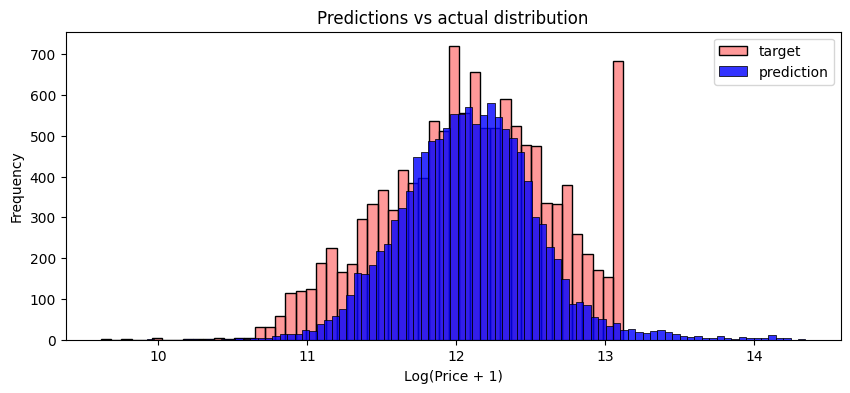

In [31]:
plt.figure(figsize=(10, 4))

sns.histplot(y_train, label='target', color='red', alpha=0.4)
sns.histplot(y_pred_baseline_zero, label='prediction', color='blue', alpha=0.8)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

Baseline Solution RMSE Value

In [32]:
rmse(y_train, y_pred_baseline_zero)

0.3413135910156676

In [33]:
score_baseline_zero=round(rmse(y_train, y_pred_baseline_zero),2)

### Validation Solution

In [34]:
df_val.total_bedrooms=prepare_X(df_val.total_bedrooms,0)

In [35]:
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19660,37.51,-120.85,15.0,1131.0,285.0,728.0,281.0,1.5531
4415,34.09,-118.25,52.0,1866.0,470.0,1211.0,417.0,2.9350
18113,37.31,-122.02,34.0,2629.0,433.0,1301.0,431.0,6.0830
17673,37.30,-121.88,16.0,2692.0,749.0,1674.0,681.0,2.6763
16992,37.56,-122.27,17.0,3211.0,847.0,1553.0,812.0,4.9434
...,...,...,...,...,...,...,...,...
20011,36.05,-119.12,27.0,1575.0,321.0,1063.0,317.0,2.1477
12225,33.65,-116.90,15.0,652.0,149.0,248.0,97.0,2.1071
1051,38.34,-120.71,16.0,1257.0,231.0,559.0,213.0,4.4531
14519,32.91,-117.13,16.0,2715.0,581.0,1619.0,584.0,4.0000


In [36]:
y_pred_val= w_0_baseline_zero  + df_val.dot(w_baseline_zero)

In [37]:
y_pred_val

19660    11.468796
4415     12.058235
18113    12.655293
17673    12.095241
16992    12.631020
           ...    
20011    11.491887
12225    11.540123
1051     11.682920
14519    12.178823
11410    12.235890
Length: 4128, dtype: float64

In [38]:
y_val

19660    11.441440
4415     12.151622
18113    12.740813
17673    12.160557
16992    12.584855
           ...    
20011    10.894904
12225    11.448931
1051     11.879657
14519    11.949250
11410    11.975407
Name: median_house_value, Length: 4128, dtype: float64

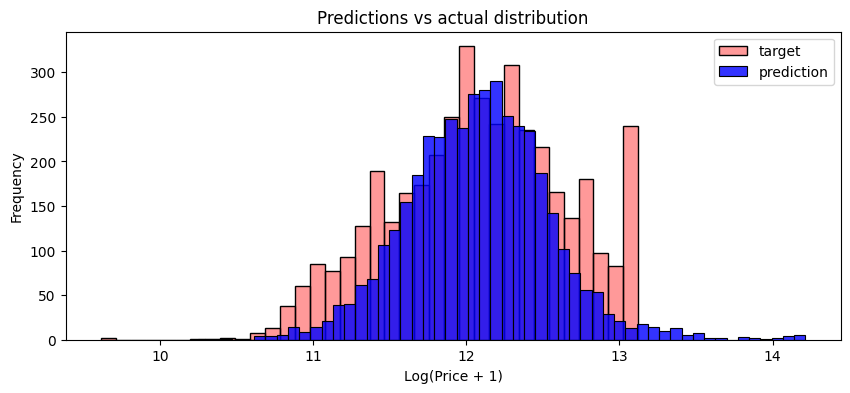

In [39]:
plt.figure(figsize=(10, 4))

sns.histplot(y_val,label='target', color='red', alpha=0.4)
sns.histplot(y_pred_val, label='prediction', color='blue', alpha=0.8)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [40]:
score=rmse(y_val, y_pred_val)

In [41]:
rmse_fillna_zero=round(score,2)

In [42]:
rmse_fillna_zero

0.33

## Option 2: Fill with mean

In [43]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# set target value for training, validation and test sets
y_train_orig = df_train['median_house_value']
y_val_orig = df_train['median_house_value']
y_test_orig = df_train['median_house_value']

# apply log transformation
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

# delete targets values from train, test and validation sets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [44]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [45]:
df_train.total_bedrooms=prepare_X(df_train.total_bedrooms,df_train.total_bedrooms.mean())

In [46]:
df_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [47]:
df_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [48]:
w_0_baseline_mean, w_baseline_mean = train_linear_regression(df_train, y_train)

In [49]:
w_0_baseline_mean,w_baseline_mean

(-11.759590872451506,
 array([-2.82182103e-01, -2.76809637e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [50]:
y_pred_baseline_mean = w_0_baseline_mean + df_train.dot(w_baseline_mean)

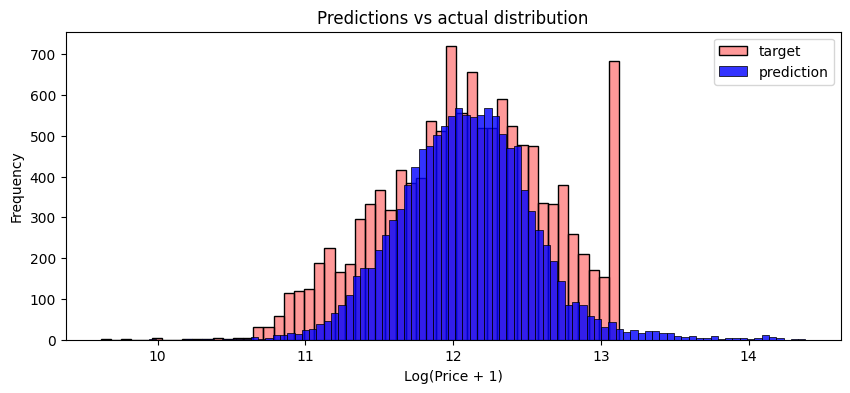

In [51]:
plt.figure(figsize=(10, 4))

sns.histplot(y_train,label='target', color='red', alpha=0.4)
sns.histplot(y_pred_baseline_mean, label='prediction', color='blue', alpha=0.8)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [56]:
round(rmse(y_train, y_pred_baseline_mean),2)

0.34

## Validation

In [57]:
df_val.total_bedrooms=prepare_X(df_val.total_bedrooms,df_val.total_bedrooms.mean())

In [58]:
w_0_validation_mean, w_validation_mean = train_linear_regression(df_val, y_val)
y_pred_val_2 = w_0_validation_mean + df_val.dot(w_validation_mean)

In [59]:
y_val

19660    11.441440
4415     12.151622
18113    12.740813
17673    12.160557
16992    12.584855
           ...    
20011    10.894904
12225    11.448931
1051     11.879657
14519    11.949250
11410    11.975407
Name: median_house_value, Length: 4128, dtype: float64

In [60]:
y_pred_val_2

19660    11.427117
4415     12.084925
18113    12.657374
17673    12.105021
16992    12.644953
           ...    
20011    11.462130
12225    11.509373
1051     11.662858
14519    12.156162
11410    12.249788
Length: 4128, dtype: float64

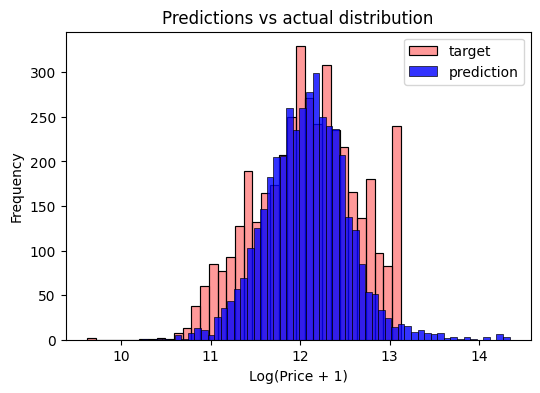

In [61]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val,label='target', color='red', alpha=0.4)
sns.histplot(y_pred_val_2, label='prediction', color='blue', alpha=0.8)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [65]:
rmse_fillna_mean=round(rmse(y_val, y_pred_val_2),2)

In [66]:
rmse_fillna_zero

0.33

In [68]:
print("Score for validation with filling na with 0 is : {} ".format(rmse_fillna_zero))
print("Score for validation with filling na with 0 is : {} ".format(rmse_fillna_mean))

Score for validation with filling na with 0 is : 0.33 
Score for validation with filling na with 0 is : 0.33 


**Correct Answer: Both are equally good**

**Question 4**

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.

- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

- Use RMSE to evaluate the model on the validation dataset.

- Round the RMSE scores to 2 decimal digits.

- Which r gives the best RMSE?

- If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

## Regularization

In [69]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# set target value for training, validation and test sets
y_train_orig = df_train['median_house_value']
y_val_orig = df_train['median_house_value']
y_test_orig = df_train['median_house_value']

# apply log transformation
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

# delete targets values from train, test and validation sets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [70]:
df_train.total_bedrooms = prepare_X(df_train.total_bedrooms,0)
df_val.total_bedrooms = prepare_X(df_val.total_bedrooms,0)

In [74]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [77]:
X_train = prepare_X(df_train.total_bedrooms,0)
X_val = prepare_X(df_val.total_bedrooms,0)

X_train=df_train
X_val=df_val

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


The correct answer is **0**

**Question 5**

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?


a. 0.5

b. 0.05

c. 0.005

d. 0.0005


Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [99]:
rmse_score=[]
for seed in range(10):
  np.random.seed(seed)

  n = len(df)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  # set target value for training, validation and test sets
  y_train_orig = df_train['median_house_value']
  y_val_orig = df_train['median_house_value']
  y_test_orig = df_train['median_house_value']

  # apply log transformation
  y_train = np.log1p(df_train['median_house_value'])
  y_val = np.log1p(df_val['median_house_value'])
  y_test = np.log1p(df_test['median_house_value'])

  # delete targets values from train, test and validation sets
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  # file missing values with 0
  df_train.total_bedrooms = prepare_X(df_train.total_bedrooms,0)
  df_val.total_bedrooms = prepare_X(df_val.total_bedrooms,0)

  w_0, w = train_linear_regression(df_train, y_train)
  y_pred = w_0 + df_val.dot(w)
  score=round(rmse(y_val,y_pred),2)
  rmse_score.append(score)
  print('For seed: %1s' %seed,"rmse score is :", round(rmse(y_val, y_pred),2))
print("---------------------------")
print("Standard deviation is ", np.round(np.std(rmse_score),3))

For seed: 0 rmse score is : 0.34
For seed: 1 rmse score is : 0.34
For seed: 2 rmse score is : 0.33
For seed: 3 rmse score is : 0.34
For seed: 4 rmse score is : 0.34
For seed: 5 rmse score is : 0.34
For seed: 6 rmse score is : 0.35
For seed: 7 rmse score is : 0.34
For seed: 8 rmse score is : 0.35
For seed: 9 rmse score is : 0.34
---------------------------
Standard deviation is  0.005


The correct answer is 0.005

**Question 6**

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [104]:
np.random.seed(9)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

concat_set = [df_train, df_val]
df_train_val = pd.concat(concat_set)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# set target value for training, validation and test sets
y_train_val_orig = df_train_val['median_house_value']
y_test_orig = df_test['median_house_value']

# apply log transformation
y_train_val = np.log1p(df_train_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

# delete targets values from train, test and validation sets
del df_train_val['median_house_value']
del df_test['median_house_value']

In [105]:
df_train_val.total_bedrooms = prepare_X(df_train_val.total_bedrooms, 0)
w_0_train_val, w_train_val = train_linear_regression_reg(df_train_val, y_train_val, r=0.001)

In [107]:
print(df_test.total_bedrooms.shape)
print(w_train_val.shape)

(4128,)
(8,)


In [109]:
df_test.total_bedrooms = prepare_X(df_test.total_bedrooms, 0)
y_pred_test = w_0_train_val + df_test.dot(w_train_val)

np.round(rmse(y_test, y_pred_test),2)

0.35

**The correct answer is 0.33**